In [26]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales 2025-I*

---

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci
import sympy as sp
import math as mt

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

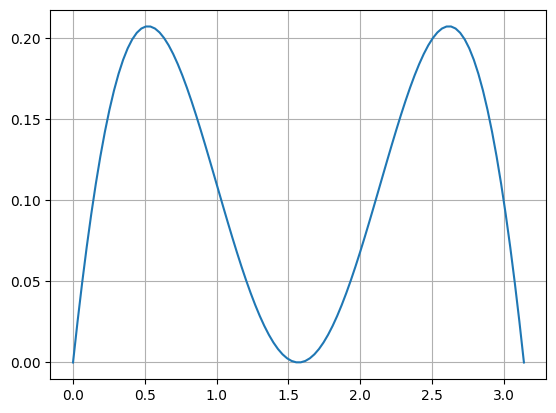

In [28]:
#a
x=np.array([0,np.pi/2,np.pi])
y=np.array([0,1,0])
f=lambda x: np.sin(x)
df=lambda x: -np.cos(x)
lag=sci.lagrange(x,y)
xi=np.linspace(min(x),max(x),100)
err=lambda x: 1/mt.factorial(3)*df(x)*(x-0)*(x-np.pi/2)*(x-np.pi)
plt.plot(xi,abs(err(xi)))
plt.grid()

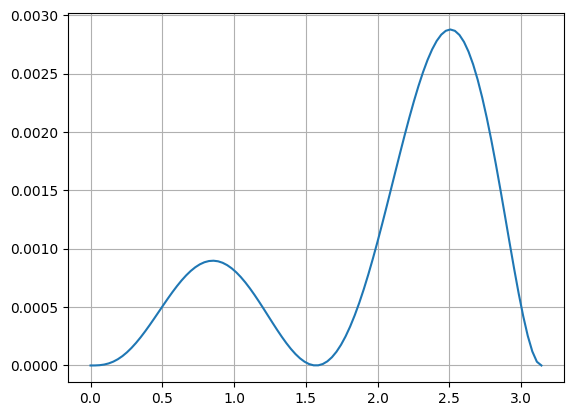

In [29]:
#b
x=np.array([0,np.pi/2,np.pi])
y=np.array([0,1,0])
dx=np.array([-1,0,1])
f=lambda x: np.sin(x)
df=lambda x: -np.sin(x)
her=sci.CubicHermiteSpline(x,y,dx)
err=lambda x: (df(x)/mt.factorial(6))*(x-0)**2*(x-np.pi/2)**2*(x-np.pi)
xi=np.linspace(min(x),max(x),100)
plt.plot(xi,err(xi))
plt.grid()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [30]:
#a
er=78
l=55
e= np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
o= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
#calculo de o0 con el primer punto de energia y de sigma_exp
o0=10.6*((0-er)**2+((l**2)/4))
f=lambda e: o0/((e-er)**2+((l**2)/4))
lag=sci.lagrange(e,o)
x=sp.symbols("x")
def diferencias_divididas(x,y,i,j):
  if len(x)!=len(y):
    return print("x y y deben tener el mismo tamaño")
  elif i==j:
    return y[i]
  else:
    num=diferencias_divididas(x,y,i+1,j)-diferencias_divididas(x,y,i,j-1)
    den=x[j]-x[i]
    return num/den
def coeficientes(x,y):
  cof=np.zeros_like(x,dtype=float)
  for j in range(len(x)):
    cof[j]=diferencias_divididas(x,y,0,j)
  return cof
def newton(x,y,xi):
  a=coeficientes(x,y)
  p=a[0]
  pro=1
  for i in range(1,len(x)):
    pro*=(xi-x[i-1])
    p+=a[i]*pro
  return p
new=newton(e,o,x)
df= lambda e: -o0*((2*(e-er))/(((e-er)**2+((l**2)/4))**2))
dx=[]
n=0
for i in e:
  dx.append(df(e[n]))
  n+=1
her=sci.CubicHermiteSpline(e,o,dx).c
print("lagrange:",lag)
display("newton:", new.expand())
display("hermite:",her)

lagrange:             8             7             6             5             4
-1.155e-13 x + 9.976e-11 x - 3.543e-08 x + 6.631e-06 x - 0.0006943 x
            3         2
 + 0.03955 x - 1.093 x + 11.41 x + 10.6


'newton:'

                        8                         7                        6   ↪
- 1.15516952380952e-13⋅x  + 9.97636063492064e-11⋅x  - 3.54296888888889e-8⋅x  + ↪

↪                       5                         4                       3    ↪
↪  6.63147377777778e-6⋅x  - 0.000694254622222222⋅x  + 0.0395537377777778⋅x  -  ↪

↪                   2                            
↪ 1.09330293650794⋅x  + 11.4071380952381⋅x + 10.6

'hermite:'

array([[ 6.63032147e-04, -6.11956699e-06, -1.00094058e-03,
         1.79979309e-03, -3.47457489e-04, -5.48856979e-04,
        -3.64827435e-04,  1.20879391e-04],
       [-1.76056257e-02,  2.23670075e-02,  1.81624853e-02,
        -1.23830284e-01,  3.90070663e-02,  3.01672327e-02,
         1.68763022e-02, -3.25691519e-03],
       [ 2.41745550e-01,  6.04649542e-01,  1.71152573e+00,
         7.42886410e-01, -2.07401573e+00, -7.75145204e-01,
        -2.95890408e-01, -1.36126739e-01],
       [ 1.06000000e+01,  1.60000000e+01,  4.50000000e+01,
         8.35000000e+01,  5.28000000e+01,  1.99000000e+01,
         1.08000000e+01,  8.25000000e+00]])

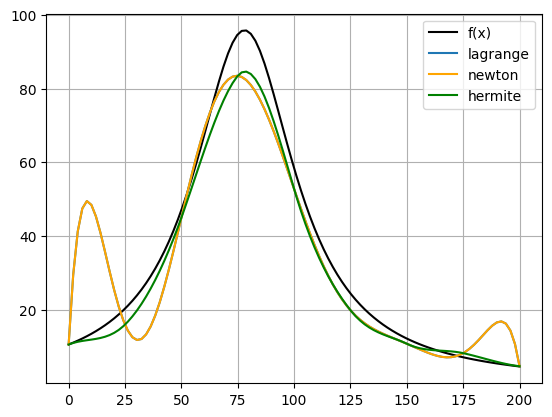

In [31]:
h=sci.CubicHermiteSpline(e,o,dx)
n=sp.lambdify(x,new)
xi=np.linspace(min(e),max(e),100)
plt.plot(xi,f(xi),label="f(x)",color="black")
plt.plot(xi,lag(xi),label="lagrange")
plt.plot(xi,n(xi),label="newton",color="orange")
plt.plot(xi,h(xi),label="hermite",color="green")
plt.grid()
plt.legend()

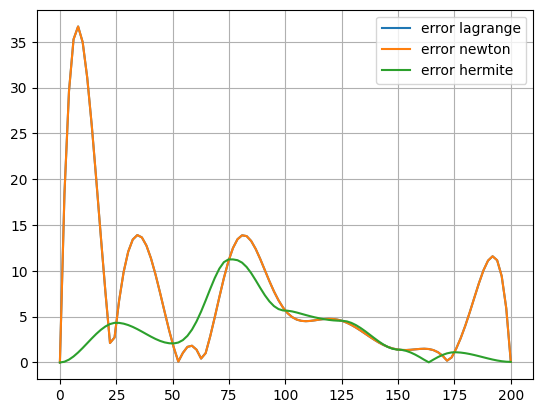

In [32]:
#c
err_l=abs(f(xi)-lag(xi))
err_n=abs(f(xi)-n(xi))
err_h=abs(f(xi)-h(xi))
plt.plot(xi, err_l,label="error lagrange")
plt.plot(xi,err_n,label="error newton")
plt.plot(xi,err_h,label="error hermite")
plt.grid()
plt.legend()
# el mejor de los tres metodos es hermite pues es el que tiene menos errores

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

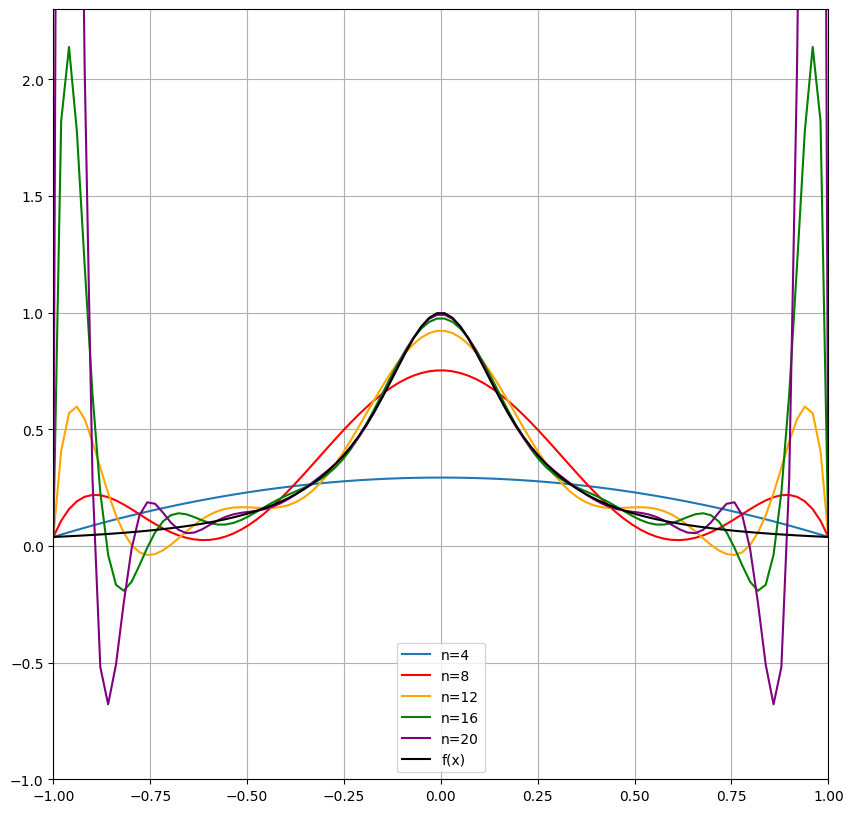

In [33]:
#a
f=lambda x: 1/(1+25*x**2)
n4=np.linspace(-1,1,4)
n8=np.linspace(-1,1,8)
n12=np.linspace(-1,1,12)
n16=np.linspace(-1,1,16)
n20=np.linspace(-1,1,20)
lag4=sci.lagrange(n4,f(n4))
lag8=sci.lagrange(n8,f(n8))
lag12=sci.lagrange(n12,f(n12))
lag16=sci.lagrange(n16,f(n16))
lag20=sci.lagrange(n20,f(n20))
xi=np.linspace(-1,1,100)
plt.figure(figsize=(10,10))
plt.plot(xi,lag4(xi),label="n=4")
plt.plot(xi,lag8(xi),label="n=8",color="red")
plt.plot(xi,lag12(xi),label="n=12",color="orange")
plt.plot(xi,lag16(xi),label="n=16",color="green")
plt.plot(xi,lag20(xi),label="n=20",color="purple")
plt.plot(xi,f(xi),label="f(x)",color="black")
plt.axis([-1,1,-1,2.3])
plt.legend()
plt.grid()

In [34]:
#b
x=sp.symbols("x")
fs=1/(1+25*x**2)
df=sp.diff(fs,x,4)
df_n = sp.lambdify(x,df)
err=lambda x: (1/mt.factorial(4))*df_n(x)*(x-n4[0])*(x-n4[1])*(x-n4[2])*(x-n4[3])
print(err(0.5))

-0.43492606549410456


In [35]:
#c
df=sp.diff(fs,x,4)
n4=np.linspace(-1,1,4)
n8=np.linspace(-1,1,8)
n12=np.linspace(-1,1,12)
n16=np.linspace(-1,1,16)
n20=np.linspace(-1,1,20)
sp.lambdify(x,df,"numpy")
df

      ⎛         4           2      ⎞
      ⎜  10000⋅x       300⋅x       ⎟
15000⋅⎜──────────── - ───────── + 1⎟
      ⎜           2       2        ⎟
      ⎜⎛    2    ⎞    25⋅x  + 1    ⎟
      ⎝⎝25⋅x  + 1⎠                 ⎠
────────────────────────────────────
                       3            
            ⎛    2    ⎞             
            ⎝25⋅x  + 1⎠             

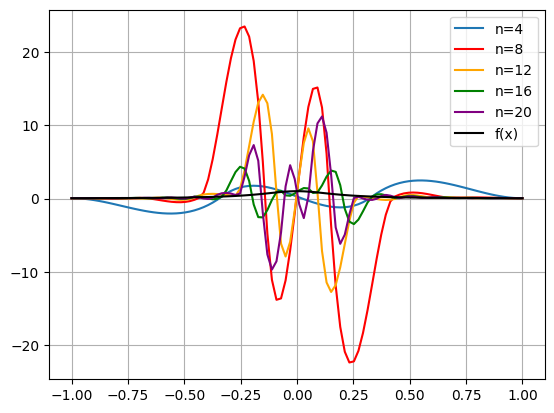

In [36]:
Df=lambda x: (1500*((10000*x**4/(25*x**2+1)**2)-(300*x**2/(25*x**2+1))+1))/(25*x**2+1)**3
her4=sci.CubicHermiteSpline(n4,f(n4),Df(n4))
her8=sci.CubicHermiteSpline(n8,f(n8),Df(n8))
her12=sci.CubicHermiteSpline(n12,f(n12),Df(n12))
her16=sci.CubicHermiteSpline(n16,f(n16),Df(n16))
her20=sci.CubicHermiteSpline(n20,f(n20),Df(n20))
xi=np.linspace(-1,1,100)
plt.plot(xi,her4(xi),label="n=4")
plt.plot(xi,her8(xi),label="n=8",color="red")
plt.plot(xi,her12(xi),label="n=12",color="orange")
plt.plot(xi,her16(xi),label="n=16",color="green")
plt.plot(xi,her20(xi),label="n=20",color="purple")
plt.plot(xi,f(xi),label="f(x)",color="black")
plt.grid()
plt.legend()
#si hay diferencias pues lagrange converge muy bien en el centro pero falla mucho en las esquinas y hermite es todo lo contrario

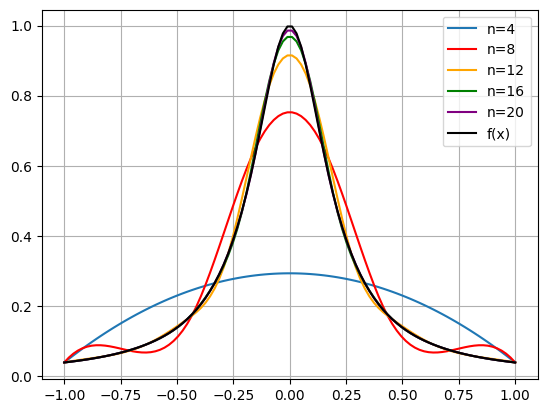

In [37]:
#d
cub4=sci.CubicSpline(n4,f(n4))
cub8=sci.CubicSpline(n8,f(n8))
cub12=sci.CubicSpline(n12,f(n12))
cub16=sci.CubicSpline(n16,f(n16))
cub20=sci.CubicSpline(n20,f(n20))
xi=np.linspace(-1,1,100)
plt.plot(xi,cub4(xi),label="n=4")
plt.plot(xi,cub8(xi),label="n=8",color="red")
plt.plot(xi,cub12(xi),label="n=12",color="orange")
plt.plot(xi,cub16(xi),label="n=16",color="green")
plt.plot(xi,cub20(xi),label="n=20",color="purple")
plt.plot(xi,f(xi),label="f(x)",color="black")
plt.grid()
plt.legend()
#cubicsplines es el que mejor converge de los tres pues no tiene errores tan grandes en el centro ni en las esquinas

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

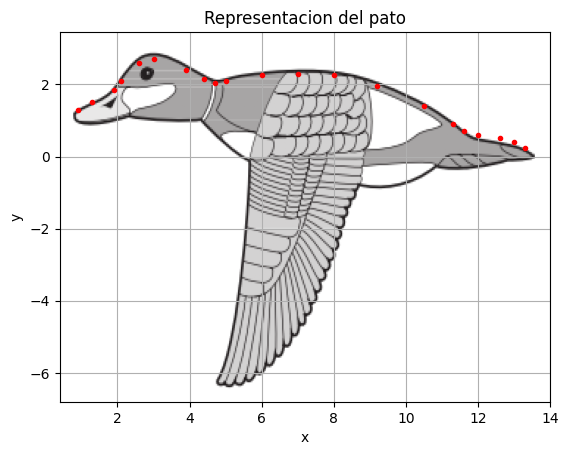

In [38]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

(0.2799999999999999, 13.920000000000002, 0.1275, 2.8225000000000002)

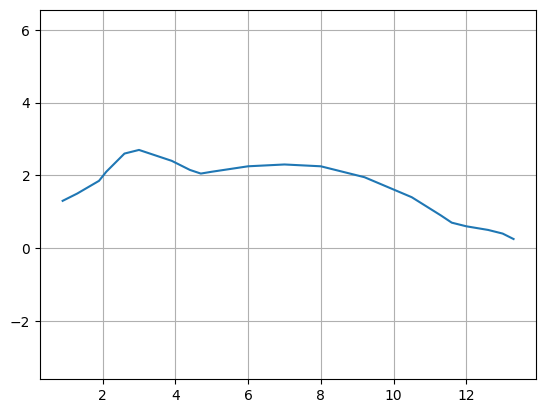

In [39]:
#2
xi=[0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
yi=[1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
plt.plot(xi,yi)
plt.grid()
plt.axis("equal")

(0.2799999999999999, 13.920000000000002, -5.0629532101191215, 5.310705770399909)

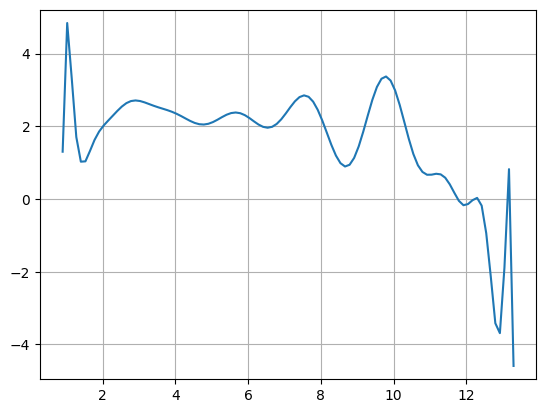

In [40]:
#3
lag=sci.lagrange(xi,yi)
xint=np.linspace(min(xi),max(xi),100)
plt.plot(xint,lag(xint))
plt.grid()
plt.axis("equal")

(0.2799999999999999, 13.920000000000002, 0.12755431700646247, 2.821359342864288)

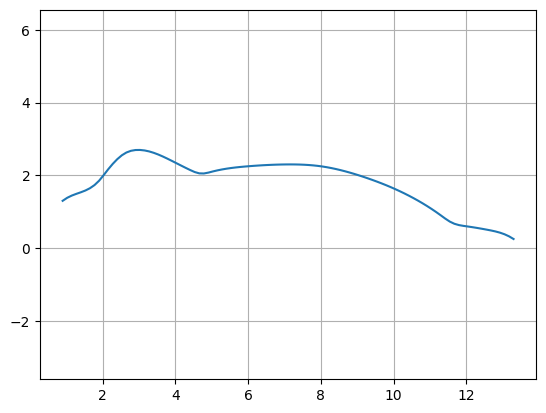

In [41]:
#4
cub=sci.CubicSpline(xi,yi)
plt.plot(xint,cub(xint))
plt.grid()
plt.axis("equal")

(0.4, 14.0, -6.8, 5.421134607576951)

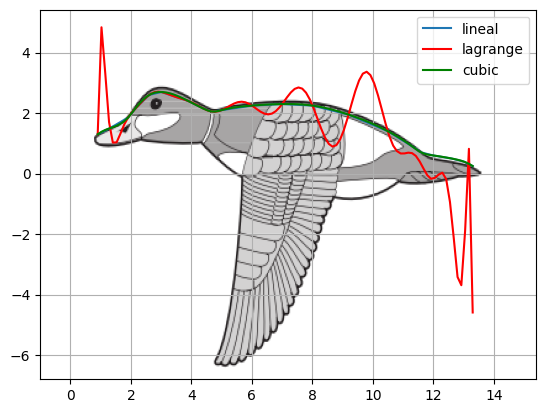

In [42]:
#5
plt.plot(xi,yi,label="lineal")
plt.plot(xint,lag(xint),label="lagrange",color="red")
plt.plot(xint,cub(xint),label="cubic",color="green")
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.grid()
plt.legend()
plt.axis("equal")
#la interpolacion de lagrange tiene muchas oscilaciones por que al haber muchos puntos esta se desestabiliza

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [43]:
# si=ai+bi(x-xi)+ci(x-xi)^2+di(x-xi)^3
# si'=bi+2ci(x-xi)+3di(x-xi)^2
# si''=2ci+6di(x-xi)
# s0=a0+b0(x+1)+c0(x+1)^2+d0(x+1)^3
# s1=a1+b1x+c1x^2+d1x^3
# s2=a2+b2(x-1)+c2(x-1)^2+d2(x-1)^3
# tenemos 12 incognitas por lo que necesitamos 12 ecuaciones
# 1
  # s0(-1)=5 == a0=5 "1"
  # s0(0)=3 == b0+c0+d0=-2 "2"
  # s1(0)=3 == a1=3 "3"
  # s1(1)=3 == b1+c1+d1=0 "4"
  # s2(1)=3 == a2=3 "5"
  # s2(2)=4 == b2+c2+d2=1 "6"
# 2
  # s0'(0)= b0+2c0+3d0
  # s1'(0)= b1
    # s0'(0)=s1'(0) == b0+2c0+3d0=b1 "7"
  # s0''(0)= 2c0+6d0
  # s1''(0)= 2c1
    # s0''(0)=s1''(0) == 2c0+6d0=2c1 "8"
  # s1'(1)= b1+2c1+3d1
  # s2'(1)= b2
    # s1'(1)=s2'(1) == b1+2c1+3d1=b2 "9"
  # s1''(1)= 2c1+6d1
  # s2''(1)= 2c2
    # s1''(1)=s2''(1) == 2c1+6d1=2c2 "10"
# 3
  # s0''(-1)=0 == 2c0=0 == c0=0 "11"
  # s2''(2)=0 == 2c2+6d2=0 == c2+3d2=0 "12"
# remplazando c0 en diferentes ecuaciones tendriamos que
  # "2" b0+d0=-2
  # "7" b0+3d0-b1=0
  # "8" 6d0-2c1=0
# entonces la matriz nos quedaria con las incognitas b0,d0,b1,c1,d1,b2,c2,d2 con las siguientes ecuaciones
  # 1. b0+d0=2
  # 2. b1+c1+d1=0
  # 3. b2+c2+d2=1
  # 4. b0+3d0-b1=0
  # 5. 6d0-2c1=0
  # 6. b1+2c1+3d1-b2=0
  # 7. 2c1+6d1-2c2=0
  # 8. c2+3d2=0
# entonces la matriz resultante en el orden de las incognitas del anteriro numeral queda
a=np.array([[1,1,0,0,0,0,0,0], # 2
                 [0,0,1,1,1,0,0,0], # 0
                 [0,0,0,0,0,1,1,1], # 1
                 [1,3,-1,0,0,0,0,0], # 0
                 [0,6,0,-2,0,0,0,0], # 0
                 [0,0,1,2,3,-1,0,0], #0
                 [0,0,0,2,6,0,-2,0], # 0
                 [0,0,0,0,0,0,1,3]]) #0
# resolviendo por gauss jordan nos quedan que
b=np.array([[2],[0],[1],[0],[0],[0],[0],[0]])
res=np.linalg.solve(a,b)
print(res)
s0= lambda x: 5+2.6*(x+1)-0.6*(x+1)**3
s1=lambda x: 3+0.8*x-1.8*x**2+1*x**3
s2=lambda x: 3+0.2*(x-1)+1.2*(x-1)**2-0.4*(x-1)**3
x=np.array([-1,0,1,2])
y=np.array([5,3,3,4])
cub=sci.CubicSpline(x,y)
print("a mano:", s2(1.5))
print("cubico:",cub(1.5))

[[ 2.6]
 [-0.6]
 [ 0.8]
 [-1.8]
 [ 1. ]
 [ 0.2]
 [ 1.2]
 [-0.4]]
a mano: 3.35
cubico: 3.4375
